# Introduction

For starters we will use ten different actors, denoted by different video id:s.


We will apply LOGO CV (Leave One Group Out cross-validation)

We will later have to take into account variables like mode (prosody or vocalization) and intensity (1-4) in the cross validation scheme. 

However for the first run it will be fine to include all without taking such factors into account.



In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy

In [2]:
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.sql_handling.execute_sql import execute_sql_pandas

# Paths

In [4]:
# path to save figures
output_path = '../../files/out/'

# Global configuration path
glob_conf_path = '../global_config.py'

In [5]:
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
from src.sql_handling.execute_sql import execute_sql_pandas

# Paths

In [7]:
# path to save figures
output_path = '../../files/out/'

# Global configuration path
glob_conf_path = '../global_config.py'

# Load global variables

In [8]:
exec(open(glob_conf_path).read())

# Select data from DB

We only select data that satisfies following three conditions:

* Success == 1
* Confidence rate >= 0.98
* mix (mixed emotions) = False(0)

We also only select the following six video_ids: 'A101', 'A102', 'A18', 'A200'

In [9]:
query = """SELECT filename,
video_id,
emotion_1,
emotion_1_id,
AU01_r,
AU02_r,
AU04_r,
AU05_r,
AU06_r,
AU07_r,
AU09_r,
AU10_r,
AU12_r,
AU14_r,
AU15_r,
AU17_r,
AU20_r,
AU23_r,
AU25_r,
AU26_r,
AU45_r
FROM openface
WHERE success = 1 AND confidence >= 0.98 AND mix = 0;"""

df, read_duration = execute_sql_pandas(query)

In [10]:
print("query executed in: {} seconds".format(read_duration))

query executed in: 121.92 seconds


In [11]:
print("control")

control


In [12]:
df

,filename,video_id,emotion_1,emotion_1_id,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A050121-R_awe_p_3,A050121-R,awe,18,0.00,0.00,0.73,0.00,1.71,0.87,...,1.25,1.61,0.05,0.00,1.86,0.04,0.23,0.00,1.53,0.29
1,A050121-R_awe_p_3,A050121-R,awe,18,0.00,0.00,0.66,0.00,1.70,0.96,...,1.27,1.54,0.07,0.00,1.68,0.03,0.23,0.00,1.41,0.13
2,A050121-R_awe_p_3,A050121-R,awe,18,0.00,0.00,0.63,0.00,1.74,1.03,...,1.32,1.52,0.08,0.00,1.57,0.03,0.20,0.00,1.32,0.04
3,A050121-R_awe_p_3,A050121-R,awe,18,0.00,0.00,0.63,0.00,1.79,1.11,...,1.33,1.51,0.10,0.00,1.57,0.01,0.17,0.00,1.33,0.23
4,A050121-R_awe_p_3,A050121-R,awe,18,0.00,0.00,0.69,0.00,1.89,1.37,...,1.33,1.53,0.10,0.04,1.59,0.01,0.11,0.00,1.41,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256963,A91_sad_p_3,A91,sad,6,0.04,0.00,0.00,0.02,0.00,0.00,...,0.64,0.71,0.00,0.00,0.00,0.00,0.00,1.64,0.00,0.03
2256964,A91_sad_p_3,A91,sad,6,0.00,0.00,0.00,0.00,0.00,0.00,...,0.57,0.67,0.00,0.04,0.02,0.00,0.00,1.54,0.00,0.04
2256965,A91_sad_p_3,A91,sad,6,0.00,0.01,0.00,0.00,0.00,0.00,...,0.50,0.64,0.00,0.10,0.02,0.00,0.00,1.44,0.00,0.02
2256966,A91_sad_p_3,A91,sad,6,0.00,0.10,0.00,0.00,0.00,0.00,...,0.50,0.64,0.00,0.17,0.05,0.00,0.00,1.38,0.00,0.02


Total number of instances: 2256968

Number of Instances per File (before data cleaning)
A205_sad_v_3         1549
A205_sad_v_4         1437
A205_fea_v_1         1218
A223_ple_v_4         1216
A205_sad_v_1         1214
                     ... 
A337_cont_v_1          33
A050121-R_fea_p_1      33
A75_emb_p_4            33
A55_tri_p_4_ver2       28
A303_tri_v_1           27
Name: filename, Length: 11059, dtype: int64



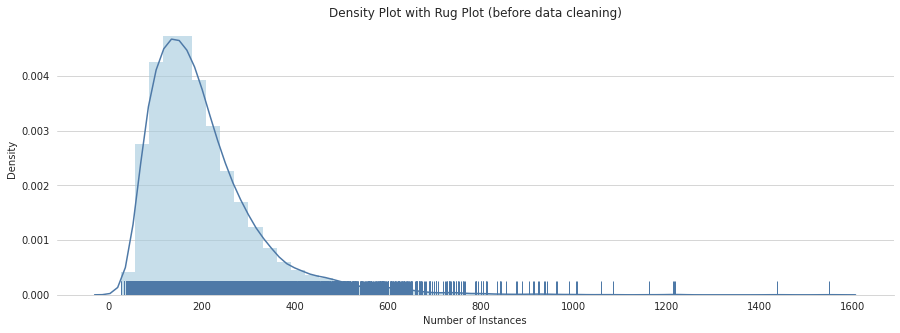


Number of Instances per Video id (before data cleaning)
A55          175856
A223         153763
A205         138796
A102         104284
A220          98337
A64           95403
A67           87301
A26           82101
A221          80079
A101          79724
A72           75630
A207          74833
A218          73902
A327          68509
A103          67451
A74           67393
A200          62858
A91           60390
A334          57481
A65           56855
A227          54368
A75           54269
A323          53884
A18           53233
A201          50628
A303          42662
A332          42603
A21           41125
A337          39381
A34           35699
A050121-R     28170
Name: video_id, dtype: int64


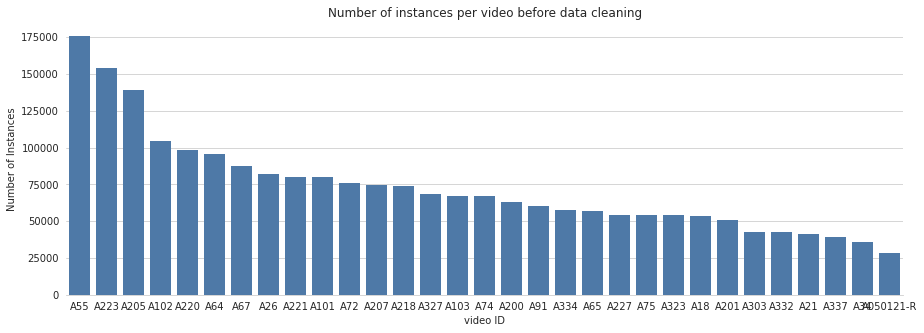


Number of Instances per Emotion (before data cleaning)
conc       60531
dou        59979
nos        59407
sad        59331
awe        58036
pea        57297
sha        55597
anx        55590
gui        55249
mov        55187
emb        54202
conf       53372
reg        52691
sat        52462
env        52032
ple        51998
bor        51985
ins        51668
sex        51261
ele        51239
hop        51082
neu        50845
ang        50777
disa       50734
neg_sur    50380
adm        49997
scha       49572
ten        49509
fea        49321
cont       49302
rej        49249
int        48368
gra        48286
pos_sur    48231
det        47574
rel        47537
pri        47385
disg       46731
exc        46415
dist       46387
sar        45912
amu        45522
hap        44846
tri        43892
Name: emotion_1, dtype: int64


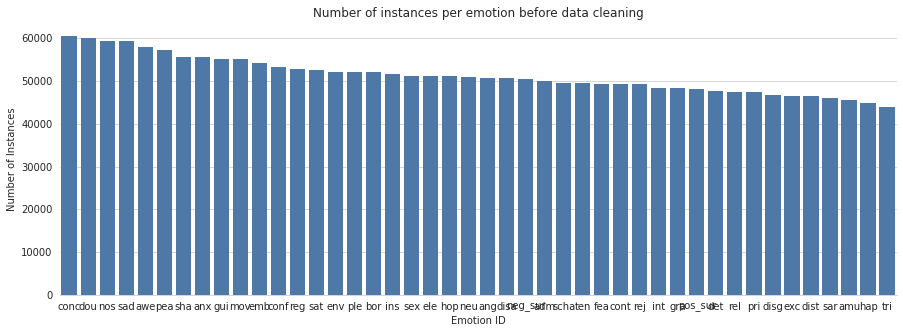

In [13]:
print("Total number of instances: {}".format(len(df)))
print()


print("Number of Instances per File (before data cleaning)")
file_val_counts_original = df["filename"].value_counts()
print(file_val_counts_original)
print()


x = file_val_counts_original.values
plt.figure(figsize=(15,5))
sns.distplot(x, rug=True, norm_hist=True,
             rug_kws={'color': blue_shades[0],'alpha':1},
             kde_kws={'color': blue_shades[0],'alpha':1},
             hist_kws={'color': blue_shades[1], 'alpha':0.6}
            )
plt.xlabel('Number of Instances')
plt.ylabel('Density')
plt.grid(False,axis='x')
plt.savefig(os.path.join(output_path,'charts','report_distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.title('Density Plot with Rug Plot (before data cleaning)')
plt.savefig(os.path.join(output_path,'charts','distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()


print("Number of Instances per Video id (before data cleaning)")
video_val_counts_original = df["video_id"].value_counts()
print(video_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(video_val_counts_original.index, video_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per video before data cleaning")
plt.xlabel('video ID')
plt.ylabel('Number of Instances')
plt.show()
print()


print("Number of Instances per Emotion (before data cleaning)")
emotion_val_counts_original = df["emotion_1"].value_counts()
print(emotion_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(emotion_val_counts_original.index, emotion_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per emotion before data cleaning")
plt.xlabel('Emotion ID')
plt.ylabel('Number of Instances')
#plt.xticks(rotation=45)
plt.show()
print()

Lets see how many files we have per video id

In [14]:
print("Number of Instances per video id for every filename")
video_val_counts_original = df[['video_id','filename']].groupby(["video_id"]).filename.nunique().reset_index()
print(video_val_counts_original)
print()

Number of Instances per video id for every filename
     video_id  filename
0   A050121-R       352
1        A101       352
2        A102       352
3        A103       352
4         A18       352
5        A200       340
6        A201       352
7        A205       352
8        A207       352
9         A21       352
10       A218       344
11       A220       352
12       A221       352
13       A223       340
14       A227       352
15        A26       352
16       A303       351
17       A323       352
18       A327       342
19       A332       328
20       A334       342
21       A337       352
22        A34       352
23        A55       617
24        A64       352
25        A65       352
26        A67       328
27        A72       352
28        A74       348
29        A75       339
30        A91       352



# From time series data to average features

In [15]:
from scipy.signal import find_peaks

def my_find_peaks(x):
    """
    This function takes a 1-D array and finds all local maxima by simple comparison of neighboring values. 
    Optionally, a subset of these peaks can be selected by specifying conditions for a peak’s properties.
    """
    th = x.mean()
    val = x.values
    peaks, _ = find_peaks(val, height=th)
    return len(peaks)

In [16]:
df_tmp = df.drop(columns=["video_id", "emotion_1", "emotion_1_id"])

# Compute statistical measures 
df_tmp = df_tmp.groupby(['filename']).agg(['mean',                                    # Arithmetic mean
                                          lambda x: scipy.stats.variation(x),        # Coefficient of variation
                                          lambda x: np.percentile(x, q=20),          # 20th percentile, i.e. below this value 20% of the observations will be found
                                          lambda x: np.percentile(x, q=50),          # 50th percentile, i.e. below this value 50% of the observations will be found
                                          lambda x: np.percentile(x, q=80),          # 80th percentile, i.e. below this value 80% of the observations will be found
                                          lambda x: scipy.stats.iqr(x, rng=(20,80)), # IQR(60%) = 80th percentile - 20th percentile
                                          lambda x: my_find_peaks(x),                # Number of peaks above the adaptive threshold
                                          ]).reset_index().sort_values(by=['filename'], ignore_index=True)

# Rename columns
df_tmp.rename(columns={'<lambda_0>': 'stddevNorm',
                       '<lambda_1>': 'percentile20.0',
                       '<lambda_2>': 'percentile50.0',
                       '<lambda_3>': 'percentile80.0',
                       '<lambda_4>': 'iqr60_80-20',
                       '<lambda_5>': 'numPeaks',
                      }, level=1,inplace=True)

# Impute NaN values
# There might be some NaN values in the dataframe coming from the coefficient of variation (std(x)/mean(x) when mean(x)=0) 
df_tmp.fillna(0, inplace=True)

# Collapse hierarchical index in columns
df_tmp.columns = ['_'.join(col).strip('_') for col in df_tmp.columns.values]

# check for null values
df_tmp.isnull().values.any()

/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesi

False

In [17]:
df_tmp

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_percentile80.0,AU26_r_iqr60_80-20,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks
0,A050121-R_adm_p_1,0.047368,1.503494,0.0,0.020,0.088,0.088,1,0.025000,1.254046,...,0.652,0.620,3,0.042895,1.016055,0.0,0.03,0.090,0.090,5
1,A050121-R_adm_p_2,0.051449,1.187263,0.0,0.030,0.104,0.104,6,0.027391,2.121172,...,0.584,0.584,8,0.051014,1.302042,0.0,0.02,0.084,0.084,8
2,A050121-R_adm_p_3,0.451067,1.191646,0.0,0.000,1.142,1.142,5,0.043067,1.993472,...,0.678,0.678,8,0.320133,2.043535,0.0,0.04,0.320,0.320,2
3,A050121-R_adm_p_4,0.275325,1.230243,0.0,0.050,0.656,0.656,4,0.044675,1.938180,...,1.238,1.236,8,0.087532,1.541024,0.0,0.01,0.158,0.158,5
4,A050121-R_adm_v_1,0.038864,1.073908,0.0,0.015,0.084,0.084,5,0.039773,2.356469,...,0.338,0.338,5,0.061591,1.353529,0.0,0.01,0.110,0.110,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,A91_tri_p_4,0.466135,1.668322,0.0,0.010,0.756,0.756,7,0.239324,2.368145,...,1.252,1.252,9,0.192319,2.633971,0.0,0.00,0.248,0.248,11
11055,A91_tri_v_1,0.177442,1.438566,0.0,0.010,0.478,0.478,4,0.067054,1.858908,...,0.750,0.750,11,0.125194,1.631348,0.0,0.01,0.234,0.234,6
11056,A91_tri_v_2,0.116389,1.639590,0.0,0.020,0.194,0.194,8,0.055972,2.073312,...,0.340,0.340,13,0.242986,2.174769,0.0,0.02,0.376,0.376,4
11057,A91_tri_v_3,0.525595,1.517433,0.0,0.000,0.948,0.948,14,0.097440,2.055221,...,0.326,0.326,18,0.441310,1.996030,0.0,0.00,0.612,0.612,6


# Normalize training set

Merge on filename index... Merge with metadata afterwards...

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

In [18]:
from sklearn import preprocessing

# create a separate dataframe to keep track of index
df_filename = df_tmp[["filename"]]

# get only features
X = df_tmp.drop(columns=['filename'])

min_max_scaler = preprocessing.MinMaxScaler()

# Fit and transform features
X_scaled = min_max_scaler.fit_transform(X)

# Create a dataframe from normalized features
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns.to_list())

# join back on index with filename dataframe
X_scaled_df = df_filename.join(X_scaled_df)

In [19]:
X_scaled_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_percentile80.0,AU26_r_iqr60_80-20,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks
0,A050121-R_adm_p_1,0.015791,0.325018,0.0,0.100,0.009677,0.009677,0.009615,0.022253,0.052332,...,0.140926,0.139319,0.014815,0.007624,0.054201,0.0,0.166667,0.010884,0.010884,0.049505
1,A050121-R_adm_p_2,0.018096,0.186739,0.0,0.150,0.012903,0.012903,0.057692,0.025174,0.297697,...,0.123245,0.130031,0.051852,0.013339,0.144603,0.0,0.111111,0.009578,0.009578,0.079208
2,A050121-R_adm_p_3,0.243775,0.188655,0.0,0.000,0.222177,0.222177,0.048077,0.044325,0.261563,...,0.147686,0.154283,0.051852,0.202753,0.378995,0.0,0.222222,0.060949,0.060949,0.019802
3,A050121-R_adm_p_4,0.144527,0.205533,0.0,0.250,0.124194,0.124194,0.038462,0.046290,0.245917,...,0.293292,0.298246,0.051852,0.039042,0.220147,0.0,0.055556,0.025686,0.025686,0.049505
4,A050121-R_adm_v_1,0.010988,0.137171,0.0,0.075,0.008871,0.008871,0.048077,0.040300,0.364278,...,0.059282,0.066563,0.029630,0.020783,0.160879,0.0,0.055556,0.015237,0.015237,0.039604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,A91_tri_p_4,0.252284,0.397093,0.0,0.050,0.144355,0.144355,0.067308,0.284093,0.367582,...,0.296932,0.302374,0.059259,0.112793,0.565635,0.0,0.000000,0.045276,0.045276,0.108911
11055,A91_tri_v_1,0.089249,0.296626,0.0,0.050,0.088306,0.088306,0.038462,0.073631,0.223486,...,0.166407,0.172859,0.074074,0.065549,0.248699,0.0,0.055556,0.042229,0.042229,0.059406
11056,A91_tri_v_2,0.054770,0.384529,0.0,0.100,0.031048,0.031048,0.076923,0.060092,0.284155,...,0.059802,0.067079,0.088889,0.148454,0.420478,0.0,0.111111,0.073139,0.073139,0.039604
11057,A91_tri_v_3,0.285864,0.331113,0.0,0.000,0.183065,0.183065,0.134615,0.110754,0.279036,...,0.056162,0.063467,0.125926,0.288040,0.363978,0.0,0.000000,0.124510,0.124510,0.059406


In [20]:
# get the metadata from original dataframe
df_metadata = df[["filename", "video_id", "emotion_1_id"]]

# drop all duplicate rows, will collapse dataframe to unique filenames
df_metadata = df_metadata.drop_duplicates()

# merge metadata with temporary dataframe
train_scaled_df = pd.merge(X_scaled_df, df_metadata, on="filename")

In [21]:
train_scaled_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks,video_id,emotion_1_id
0,A050121-R_adm_p_1,0.015791,0.325018,0.0,0.100,0.009677,0.009677,0.009615,0.022253,0.052332,...,0.014815,0.007624,0.054201,0.0,0.166667,0.010884,0.010884,0.049505,A050121-R,5
1,A050121-R_adm_p_2,0.018096,0.186739,0.0,0.150,0.012903,0.012903,0.057692,0.025174,0.297697,...,0.051852,0.013339,0.144603,0.0,0.111111,0.009578,0.009578,0.079208,A050121-R,5
2,A050121-R_adm_p_3,0.243775,0.188655,0.0,0.000,0.222177,0.222177,0.048077,0.044325,0.261563,...,0.051852,0.202753,0.378995,0.0,0.222222,0.060949,0.060949,0.019802,A050121-R,5
3,A050121-R_adm_p_4,0.144527,0.205533,0.0,0.250,0.124194,0.124194,0.038462,0.046290,0.245917,...,0.051852,0.039042,0.220147,0.0,0.055556,0.025686,0.025686,0.049505,A050121-R,5
4,A050121-R_adm_v_1,0.010988,0.137171,0.0,0.075,0.008871,0.008871,0.048077,0.040300,0.364278,...,0.029630,0.020783,0.160879,0.0,0.055556,0.015237,0.015237,0.039604,A050121-R,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,A91_tri_p_4,0.252284,0.397093,0.0,0.050,0.144355,0.144355,0.067308,0.284093,0.367582,...,0.059259,0.112793,0.565635,0.0,0.000000,0.045276,0.045276,0.108911,A91,20
11055,A91_tri_v_1,0.089249,0.296626,0.0,0.050,0.088306,0.088306,0.038462,0.073631,0.223486,...,0.074074,0.065549,0.248699,0.0,0.055556,0.042229,0.042229,0.059406,A91,20
11056,A91_tri_v_2,0.054770,0.384529,0.0,0.100,0.031048,0.031048,0.076923,0.060092,0.284155,...,0.088889,0.148454,0.420478,0.0,0.111111,0.073139,0.073139,0.039604,A91,20
11057,A91_tri_v_3,0.285864,0.331113,0.0,0.000,0.183065,0.183065,0.134615,0.110754,0.279036,...,0.125926,0.288040,0.363978,0.0,0.000000,0.124510,0.124510,0.059406,A91,20


# Create groups for LOGO CV

We will apply LOGO CV (Leave One Group Out cross-validation)

In [22]:
train_scaled_df.video_id.unique()

array(['A050121-R', 'A101', 'A102', 'A103', 'A18', 'A200', 'A201', 'A205',
       'A207', 'A218', 'A21', 'A220', 'A221', 'A223', 'A227', 'A26',
       'A303', 'A323', 'A327', 'A332', 'A334', 'A337', 'A34', 'A55',
       'A64', 'A65', 'A67', 'A72', 'A74', 'A75', 'A91'], dtype=object)

In [23]:
def get_evens(size):
    ret = []
    for n in range(size):
        if n % 2 == 0:
            ret.append(n)
    return ret

def get_odds(size):
    ret = []
    for n in range(size):
        if n % 2 == 1:
            ret.append(n)
    return ret

In [24]:
import random

video_ids = train_scaled_df.video_id.unique()

# Find random pairs of video_ids
random.seed(seed)

# a list of even numbers
video_ids_1 = get_evens(len(video_ids))

# a list of odd numbers
video_ids_2 = get_odds(len(video_ids))

# shuffle the odd numbers
video_ids_2_shuffled = random.sample(video_ids_2, len(video_ids_2))

# assign groups for video ids by using odd and even numbers respectively
groups = {}
for i, video_id in enumerate(video_ids_1):
    groups[video_ids[video_id]] = i
    
for i, video_id in enumerate(video_ids_2_shuffled):
    groups[video_ids[video_id]] = i
    
print(groups)

# Create a copy
train_scaled_groups_df = train_scaled_df.copy()

# Insert group column
train_scaled_groups_df['group'] = train_scaled_groups_df['video_id'].map(groups)

{'A050121-R': 0, 'A102': 1, 'A18': 2, 'A201': 3, 'A207': 4, 'A21': 5, 'A221': 6, 'A227': 7, 'A303': 8, 'A327': 9, 'A334': 10, 'A34': 11, 'A64': 12, 'A67': 13, 'A74': 14, 'A91': 15, 'A337': 0, 'A26': 1, 'A55': 2, 'A218': 3, 'A65': 4, 'A205': 5, 'A103': 6, 'A323': 7, 'A200': 8, 'A75': 9, 'A223': 10, 'A220': 11, 'A72': 12, 'A332': 13, 'A101': 14}


In [25]:
train_scaled_groups_df

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks,video_id,emotion_1_id,group
0,A050121-R_adm_p_1,0.015791,0.325018,0.0,0.100,0.009677,0.009677,0.009615,0.022253,0.052332,...,0.007624,0.054201,0.0,0.166667,0.010884,0.010884,0.049505,A050121-R,5,0
1,A050121-R_adm_p_2,0.018096,0.186739,0.0,0.150,0.012903,0.012903,0.057692,0.025174,0.297697,...,0.013339,0.144603,0.0,0.111111,0.009578,0.009578,0.079208,A050121-R,5,0
2,A050121-R_adm_p_3,0.243775,0.188655,0.0,0.000,0.222177,0.222177,0.048077,0.044325,0.261563,...,0.202753,0.378995,0.0,0.222222,0.060949,0.060949,0.019802,A050121-R,5,0
3,A050121-R_adm_p_4,0.144527,0.205533,0.0,0.250,0.124194,0.124194,0.038462,0.046290,0.245917,...,0.039042,0.220147,0.0,0.055556,0.025686,0.025686,0.049505,A050121-R,5,0
4,A050121-R_adm_v_1,0.010988,0.137171,0.0,0.075,0.008871,0.008871,0.048077,0.040300,0.364278,...,0.020783,0.160879,0.0,0.055556,0.015237,0.015237,0.039604,A050121-R,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,A91_tri_p_4,0.252284,0.397093,0.0,0.050,0.144355,0.144355,0.067308,0.284093,0.367582,...,0.112793,0.565635,0.0,0.000000,0.045276,0.045276,0.108911,A91,20,15
11055,A91_tri_v_1,0.089249,0.296626,0.0,0.050,0.088306,0.088306,0.038462,0.073631,0.223486,...,0.065549,0.248699,0.0,0.055556,0.042229,0.042229,0.059406,A91,20,15
11056,A91_tri_v_2,0.054770,0.384529,0.0,0.100,0.031048,0.031048,0.076923,0.060092,0.284155,...,0.148454,0.420478,0.0,0.111111,0.073139,0.073139,0.039604,A91,20,15
11057,A91_tri_v_3,0.285864,0.331113,0.0,0.000,0.183065,0.183065,0.134615,0.110754,0.279036,...,0.288040,0.363978,0.0,0.000000,0.124510,0.124510,0.059406,A91,20,15


In [26]:
save_path = os.path.join(output_path, "video", 'video_data_intensity_train.csv')
train_scaled_groups_df.to_csv(save_path, index=None, header=True)